- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [0]:
pip install kaggle

In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
#check that it worked by listing the kaggle datasets
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          11037  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           6474  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          12145  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           5247  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [0]:
cd dsps

[Errno 2] No such file or directory: 'dsps'
/content/gdrive/My Drive/dsps


In [0]:
#create a directory for these data
!mkdir higgsbosonSearch

In [0]:
#move to that directory
cd higgsbosonSearch

/content/gdrive/My Drive/dsps/higgsbosonSearch


In [0]:
!kaggle competitions download -c higgs-boson


  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 40.7MB/s]
 53% 9.00M/16.9M [00:00<00:00, 56.8MB/s]
100% 16.9M/16.9M [00:00<00:00, 66.5MB/s]
 86% 30.0M/34.8M [00:00<00:00, 31.7MB/s]
100% 34.8M/34.8M [00:01<00:00, 35.9MB/s]
  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 829kB/s]


In [0]:
ls 

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip
random_submission.zip                    training.zip


In [0]:
!unzip training.zip
!unzip test.zip

Archive:  training.zip
  inflating: training.csv            
Archive:  test.zip
  inflating: test.csv                


In [0]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv  training.csv
random_submission.zip                    test.zip  training.zip



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [0]:
higgsdata = pd.read_csv("training.csv") # reading the data
labels = higgsdata.Label.values ## creating the variables
weights = higgsdata.Weight.values
higgsdata.drop(columns=['Weight', 'Label'], inplace=True) ## droping the last two colomns

In [0]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [0]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [0]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [0]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [0]:
from sklearn.model_selection import train_test_split 

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [0]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
gbt = GradientBoostingClassifier()

## Splitting the test and train data from the data set

In [0]:
train_HiggsData, test_HiggsData, train_HiggsData_labels, test_HiggsData_labels, train_HiggsData_weights, test_HiggsData_weights = train_test_split(higgsdata, labels, weights, test_size=0.33, random_state=222)

## Using Random Forest and Gradiant boosting classifier to fit the data

In [0]:
rf.fit(X=train_HiggsData, y=train_HiggsData_labels)  ## fitting for labels
gbt.fit(X=train_HiggsData, y=train_HiggsData_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
print("RandomForest Test score for the train data is: ", rf.score(train_HiggsData, train_HiggsData_labels), "\n"
  "and score for test data is: ", rf.score(test_HiggsData, test_HiggsData_labels))

RandomForest Test score for the train data is:  0.9884059701492537 
and score for test data is:  0.8208484848484848


In [0]:
print("Gradiant boosting classifier Test score for the train data is: ", gbt.score(train_HiggsData, train_HiggsData_labels), "\n"
  "and score for test data is: ", gbt.score(test_HiggsData, test_HiggsData_labels))

Gradiant boosting classifier Test score for the train data is:  0.834644776119403 
and score for test data is:  0.8296363636363636


# Results:
## The scores for both the methods are not far apart from each other, which means we are not overfitting the data.

In [0]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


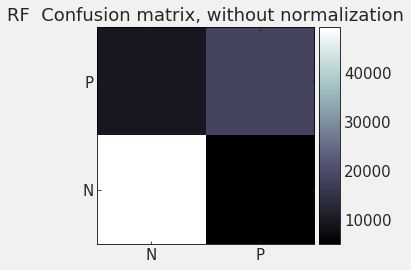

In [0]:
# for Random Forest
plot_confusion_matrix(test_HiggsData_labels, 
                      rf.predict(test_HiggsData),
                      title="RF ");

## Figure: Confusion matrix for RandomForest.

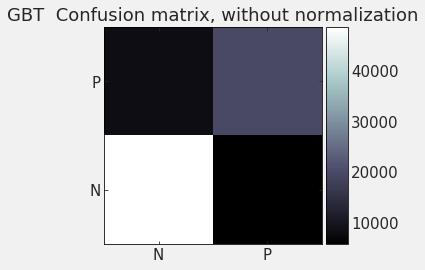

In [0]:
# for GBT
plot_confusion_matrix(test_HiggsData_labels,
                      gbt.predict(test_HiggsData), 
    
                      title="GBT ");

## Figure: Confusion matrix for GradientBoostingClassifier.

## From the figures we can see that the Random Forest model has more true positive values and hense more score for the test.



- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [0]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=223)
rf_reg.fit(X=train_HiggsData, y=train_HiggsData_weights) # for RFR

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=223, verbose=0,
                      warm_start=False)

In [0]:
gbt_reg = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=223)
gbt_reg.fit(X=train_HiggsData.values, y=train_HiggsData_weights)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=223, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [0]:
def L1(true_val, pred_val): ## to compute L1
  result = np.sum(np.abs(true_val - pred_val))
  return result

def L2(true_val, pred_val): ## to compute L2
  result = np.sum( (true_val - pred_val)**2 )
  return result

In [0]:
true_val = test_HiggsData_weights ## True values

pred_val_rf = rf_reg.predict(test_HiggsData) # predict from RF model

pred_val_gbt = gbt_reg.predict(test_HiggsData) ## predict from GBT model

 
print("L1 RF is give by : ", L1(true_val, pred_val_rf), "\n"
      "L2 RF is give by : ", L2(true_val, pred_val_rf), "\n")


print("L1 GBT is give by : ", L1(true_val, pred_val_gbt), "\n"
      "L2 GBT is give by : ", L2(true_val, pred_val_gbt))

L1 RF is give by :  83182.47968204832 
L2 RF is give by :  151957.6782813781 

L1 GBT is give by :  70079.7955051226 
L2 GBT is give by :  113078.69821285598


## GradientBoostingRegressor has lower values of L1 and L2 than RandomForestRegressor and is therefore better.

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [0]:
from sklearn.model_selection import RandomizedSearchCV

## To find the top most important features

important_features = train_HiggsData.columns[ np.argsort(rf.feature_importances_)[::-1] ] [:4]

In [0]:
higgsdata[important_features].head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
0,138.470,51.655,97.827,32.638
1,160.937,68.768,103.235,42.014
2,-999.000,162.172,125.953,32.154
3,143.905,81.417,80.943,22.647
4,175.864,16.915,134.805,28.209


In [0]:
random_grid = {'max_depth': [3, 10, None], 
               'max_features': ['auto', 'sqrt'],
               'bootstrap': [True, False],
               'n_estimators': [10, 100, 1000] }

In [0]:
pprint(random_grid)

Pretty printing has been turned OFF


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)


In [0]:
trainData = train_HiggsData[important_features]
trainLabel = train_HiggsData_labels

random_search.fit(X=trainData, y=trainLabel)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [0]:

print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best score is 0.7880955178463606


In [0]:
df = pd.DataFrame(random_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.723481,0.03947,0.303524,0.011268,10,auto,None,False,"{'n_estimators': 10, 'max_features': 'auto', '...",0.788856,0.787849,0.787581,0.788096,0.000549,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [0]:
rf = RandomForestClassifier(**random_search.best_params_)
rf.fit(train_HiggsData, train_HiggsData_labels=='s')

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

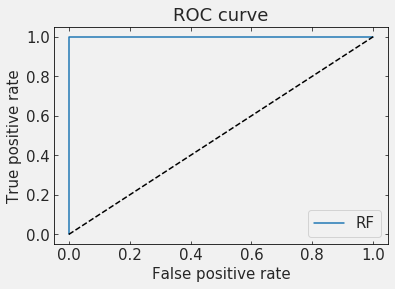

In [0]:
# The random forest model by itself
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(train_HiggsData_labels=='s', rf.predict(train_HiggsData))
plt.plot(fpr_rf, tpr_rf, label='RF')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<span style="color:red">**-5 pts: no caption no score and the RF curve can not be that good, please check you plot function**</span>

## From the plot above we see that RandomForestClassifier is better than a random classifier.

#### AMS metric from the kaggle challenge

In [0]:
import os
import csv
import math

def create_solution_dictionary(solution):
    """ Read solution file, return a dictionary with key EventId and value (weight,label).
    Solution file headers: EventId, Label, Weight """
    
    solnDict = {}
    with open(solution, 'rt') as f:
        soln = csv.reader(f)
        #soln.next() # header
        next(soln)
        for row in soln:
            if row[0] not in solnDict:
                solnDict[row[0]] = (row[1], row[2])
    return solnDict

        
def check_submission(submission, Nelements):
    """ Check that submission RankOrder column is correct:
        1. All numbers are in [1,NTestSet]
        2. All numbers are unqiue
    """
    rankOrderSet = set()    
    with open(submission, 'rt') as f:
        sub = csv.reader(f)
        #sub.next() # header
        next(sub)
        for row in sub:
            rankOrderSet.add(row[1])
            
    if len(rankOrderSet) != Nelements:
        print('RankOrder column must contain unique values')
        exit()
    #elif rankOrderSet.isdisjoint(set(xrange(1,Nelements+1))) == False:
    #    print('RankOrder column must contain all numbers from [1..NTestSset]')
    #    exit()
    else:
        return True

    
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print('radicand is negative. Exiting')
        exit()
    else:
        return math.sqrt(radicand)


def AMS_metric(solution, submission, numEvents):
    """  Prints the AMS metric value to screen.
    Solution File header: EventId, Class, Weight
    Submission File header: EventId, RankOrder, Class
    """
    
    #numEvents = 550000 # number of events = size of test set
    numEvents = numEvents
    # solutionDict: key=eventId, value=(label, class)
    solutionDict = create_solution_dictionary(solution)

    signal = 0.0
    background = 0.0
    if check_submission(submission, numEvents):
        with open(submission, 'rt') as f:
            sub = csv.reader(f)
            #sub.next() # header row
            next(sub)
            for row in sub:
                if row[2] == 's': # only events predicted to be signal are scored
                    if solutionDict[row[0]][0] == 's':
                        signal += float(solutionDict[row[0]][1])
                    elif solutionDict[row[0]][0] == 'b':
                        background += float(solutionDict[row[0]][1])
     
        print( 'signal = {0}, background = {1}'.format(signal, background) )
        print( 'AMS = ' + str(AMS(signal, background)) )

### We have seen above that RandomForest Classifier is the best model, so we will use this model to fit the data and use it in the Kagel challenge.

#### We will use the best parameters we have found from the best fit of the Random Forest Classifier

In [0]:
### RandomForestClassifier model which is our best model from the above exercise.
rf = RandomForestClassifier(**random_search.best_params_)
rf.fit(train_HiggsData, train_HiggsData_labels)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Creating the submission file and solution from the test data which we will need to use in the function provided by kegal

In [0]:
submission = pd.DataFrame()
submission['EventId'] = test_HiggsData['EventId']
submission['RankOrder'] = np.argsort( rf_reg.predict(test_HiggsData))
submission['Class'] = rf.predict(test_HiggsData)
submission.to_csv('submission.csv', index=False)
submission.head()

,EventId,RankOrder,Class
215911,315911,0,b
102355,202355,39133,b
165299,265299,39131,b
192249,292249,39130,s
31205,131205,39123,b


In [0]:
# create a solution from testdata
solution = pd.DataFrame()
solution['EventId'] = test_HiggsData['EventId']
solution['Class'] = test_HiggsData_labels
solution['Weight'] = test_HiggsData_weights
solution.to_csv('solution.csv', index=False)
solution.head()

,EventId,Class,Weight
215911,315911,b,0.083414
102355,202355,s,0.018636
165299,265299,b,1.681611
192249,292249,s,0.001503
31205,131205,b,4.883866


## Reporting the results:

In [0]:
numEvents = len(test_HiggsData_weights)
solutionFile = "solution.csv"
submissionFile = "submission.csv"

AMS_metric(solutionFile, submissionFile, numEvents)

signal = 140.86523147600883, background = 8589.766589803043
AMS = 1.5148905916533772


### Our AMS score seems pretty good. I had to run it various times since every time I disconnect I had to reconnect and run the whole notebook again, so the score changed everytime but still the average time was close to 1.5.